In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
image= cv2.imread('_DSC0029.JPG')
image=cv2.resize(image,(720,640))

In [3]:
#importing models and set mean values
face1 ="opencv_face_detector.pbtxt"
face2="opencv_face_detector_uint8.pb"
age1="age_deploy.prototxt"
age2="age_net.caffemodel"
gen1="gender_deploy.prototxt"
gen2="gender_net.caffemodel"


In [4]:
MODEL_MEAN_VALUES =(78.4263377603, 87.7689143744, 114.895847746)
#using model
#face
face=cv2.dnn.readNet(face2,face1)
#age
age=cv2.dnn.readNet(age2,age1)
#gender
gen=cv2.dnn.readNet(gen2,gen1)

In [5]:
la=['(0-2)','(4-6)','(8-12)','(15-20)','(25-32)','(38-43)','(48-53)','(60-100)']
lg=['Male','Female']

In [6]:
fr_cv=image.copy()

In [7]:
fr_h=fr_cv.shape[0]
fr_w=fr_cv.shape[1]
blob=cv2.dnn.blobFromImage(fr_cv,1.0,(300,300),[104,117,123],True,False)
face.setInput(blob)
detections=face.forward()

In [8]:
faceBoxes=[]
for i in range(detections.shape[2]):
    #bounding box creations if confidence > 0.7
    confidence=detections[0,0,i,2]
    if confidence>0.7:
        x1=int(detections[0,0,i,3]*fr_w)
        y1=int(detections[0,0,i,4]*fr_h)
        x2=int(detections[0,0,i,5]*fr_w)
        y2=int(detections[0,0,i,6]*fr_h)
        faceBoxes.append([x1,y1,x2,y2])
        cv2.rectangle(fr_cv,(x1,y1),(x2,y2),(0,255,0),int(round(fr_h/150)),8)
faceBoxes

[[265, 119, 489, 293]]

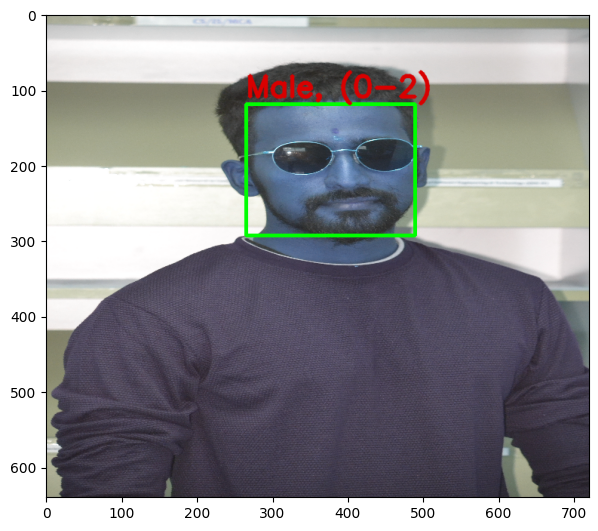

In [9]:
if not faceBoxes:
    print("No face detected")
for facebox in faceBoxes:
    face = fr_cv[
        max(0, facebox[1] - 15): min(facebox[3] + 15, fr_cv.shape[0] - 1),
        max(0, facebox[0] - 15): min(facebox[2] + 15, fr_cv.shape[1] - 1)
    ]

    #extracting the main blob part
    blob=cv2.dnn.blobFromImage(
        face,1.0,(227,227),MODEL_MEAN_VALUES,swapRB=False)

    #prediction of gender
    gen.setInput(blob)
    genderPreds=gen.forward()
    gender=lg[genderPreds[0].argmax()]

    #prediction of age
    age.setInput(blob)
    agePreds=gen.forward()
    age=la[agePreds[0].argmax()]

    #putting the text of age and gender
    #at top of box
    cv2.putText(
        fr_cv, f'{gender}, {age}', 
        (facebox[0], facebox[1] - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (217, 0, 0), 4, cv2.LINE_AA
    )

plt.figure(figsize=(7,7))
plt.imshow(fr_cv)